# BPSK

### Generating Binary Sequence

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.signal import savgol_filter

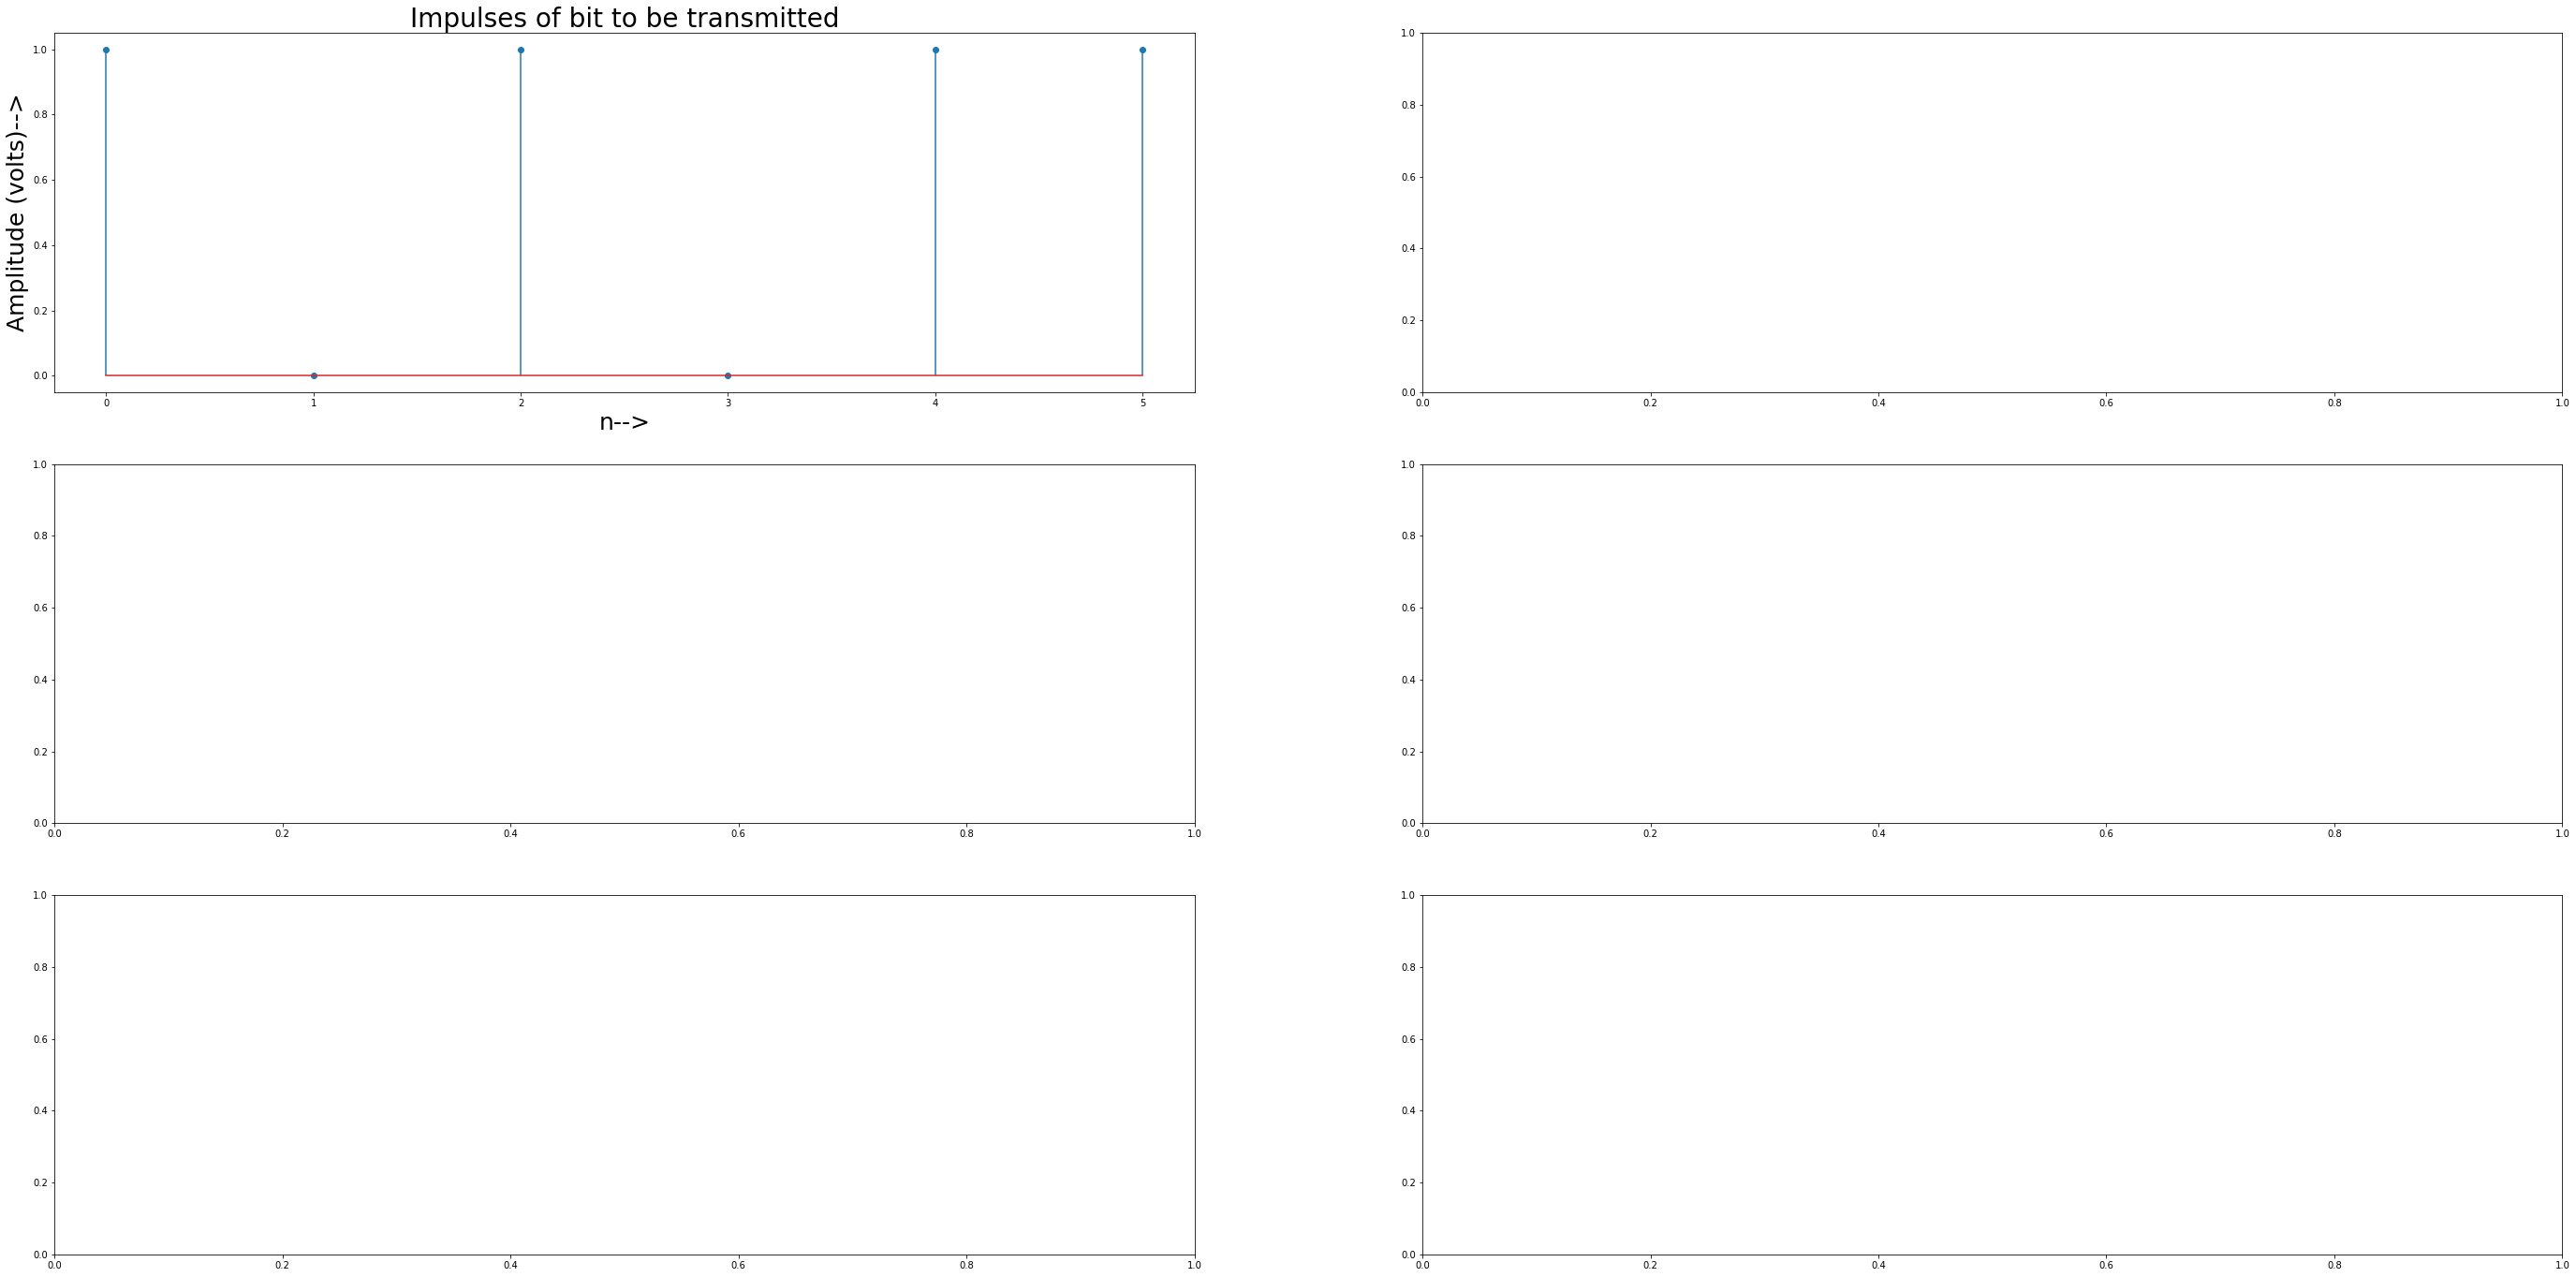

[1 0 1 0 1 1]


In [57]:
b=np.array([1,0,1,0,1,1])
Tb=1;
N=200;
fig,axes= plt.subplots(3,2,figsize=(48,24))
axes[0,0].stem(b)
axes[0,0].set_title("Impulses of bit to be transmitted",{'fontsize':28})
axes[0,0].set_xlabel('n-->',{'fontsize':25})
axes[0,0].set_ylabel('Amplitude (volts)-->',{'fontsize':25})
plt.show()
print(b)

### Generating Bipolar NRZ-L Waveform

In [45]:
# NRZ_Out=np.empty((1,len(b)*n))
NRZ_Out=[]
NRZ= np.empty((len(b),N))
Vp=1
n1=0
n2=Tb*len(b)


(6, 200)
(1, 1200)
(1, 1200)
[[0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]]
[[1. 1. 1. ... 1. 1. 1.]]


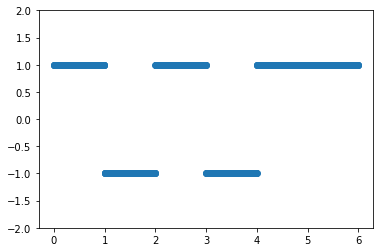

In [46]:

for i in range(0,len(b)):
    
    if b[i]==1:
        NRZ[i,:]=np.ones((1,N))*Vp
    else:
        NRZ[i,:]=np.ones((1,N))*-Vp
        
       

print(NRZ.shape)
NRZ_out=NRZ.reshape(1,len(b)*N)
print(NRZ_out.shape)
n=np.arange(n1,n2,1/N)
n=n.reshape(1,len(b)*N)
print(n.shape)
print(n)
print(NRZ_out)


### Generating Carrier Signal

In [48]:
f=5
coeff=math.sqrt(2/Tb)
angles=2*math.pi*f*n
c=coeff*np.sin(angles)
c.shape

(1, 1200)

In [49]:
Modulated=NRZ_out*c

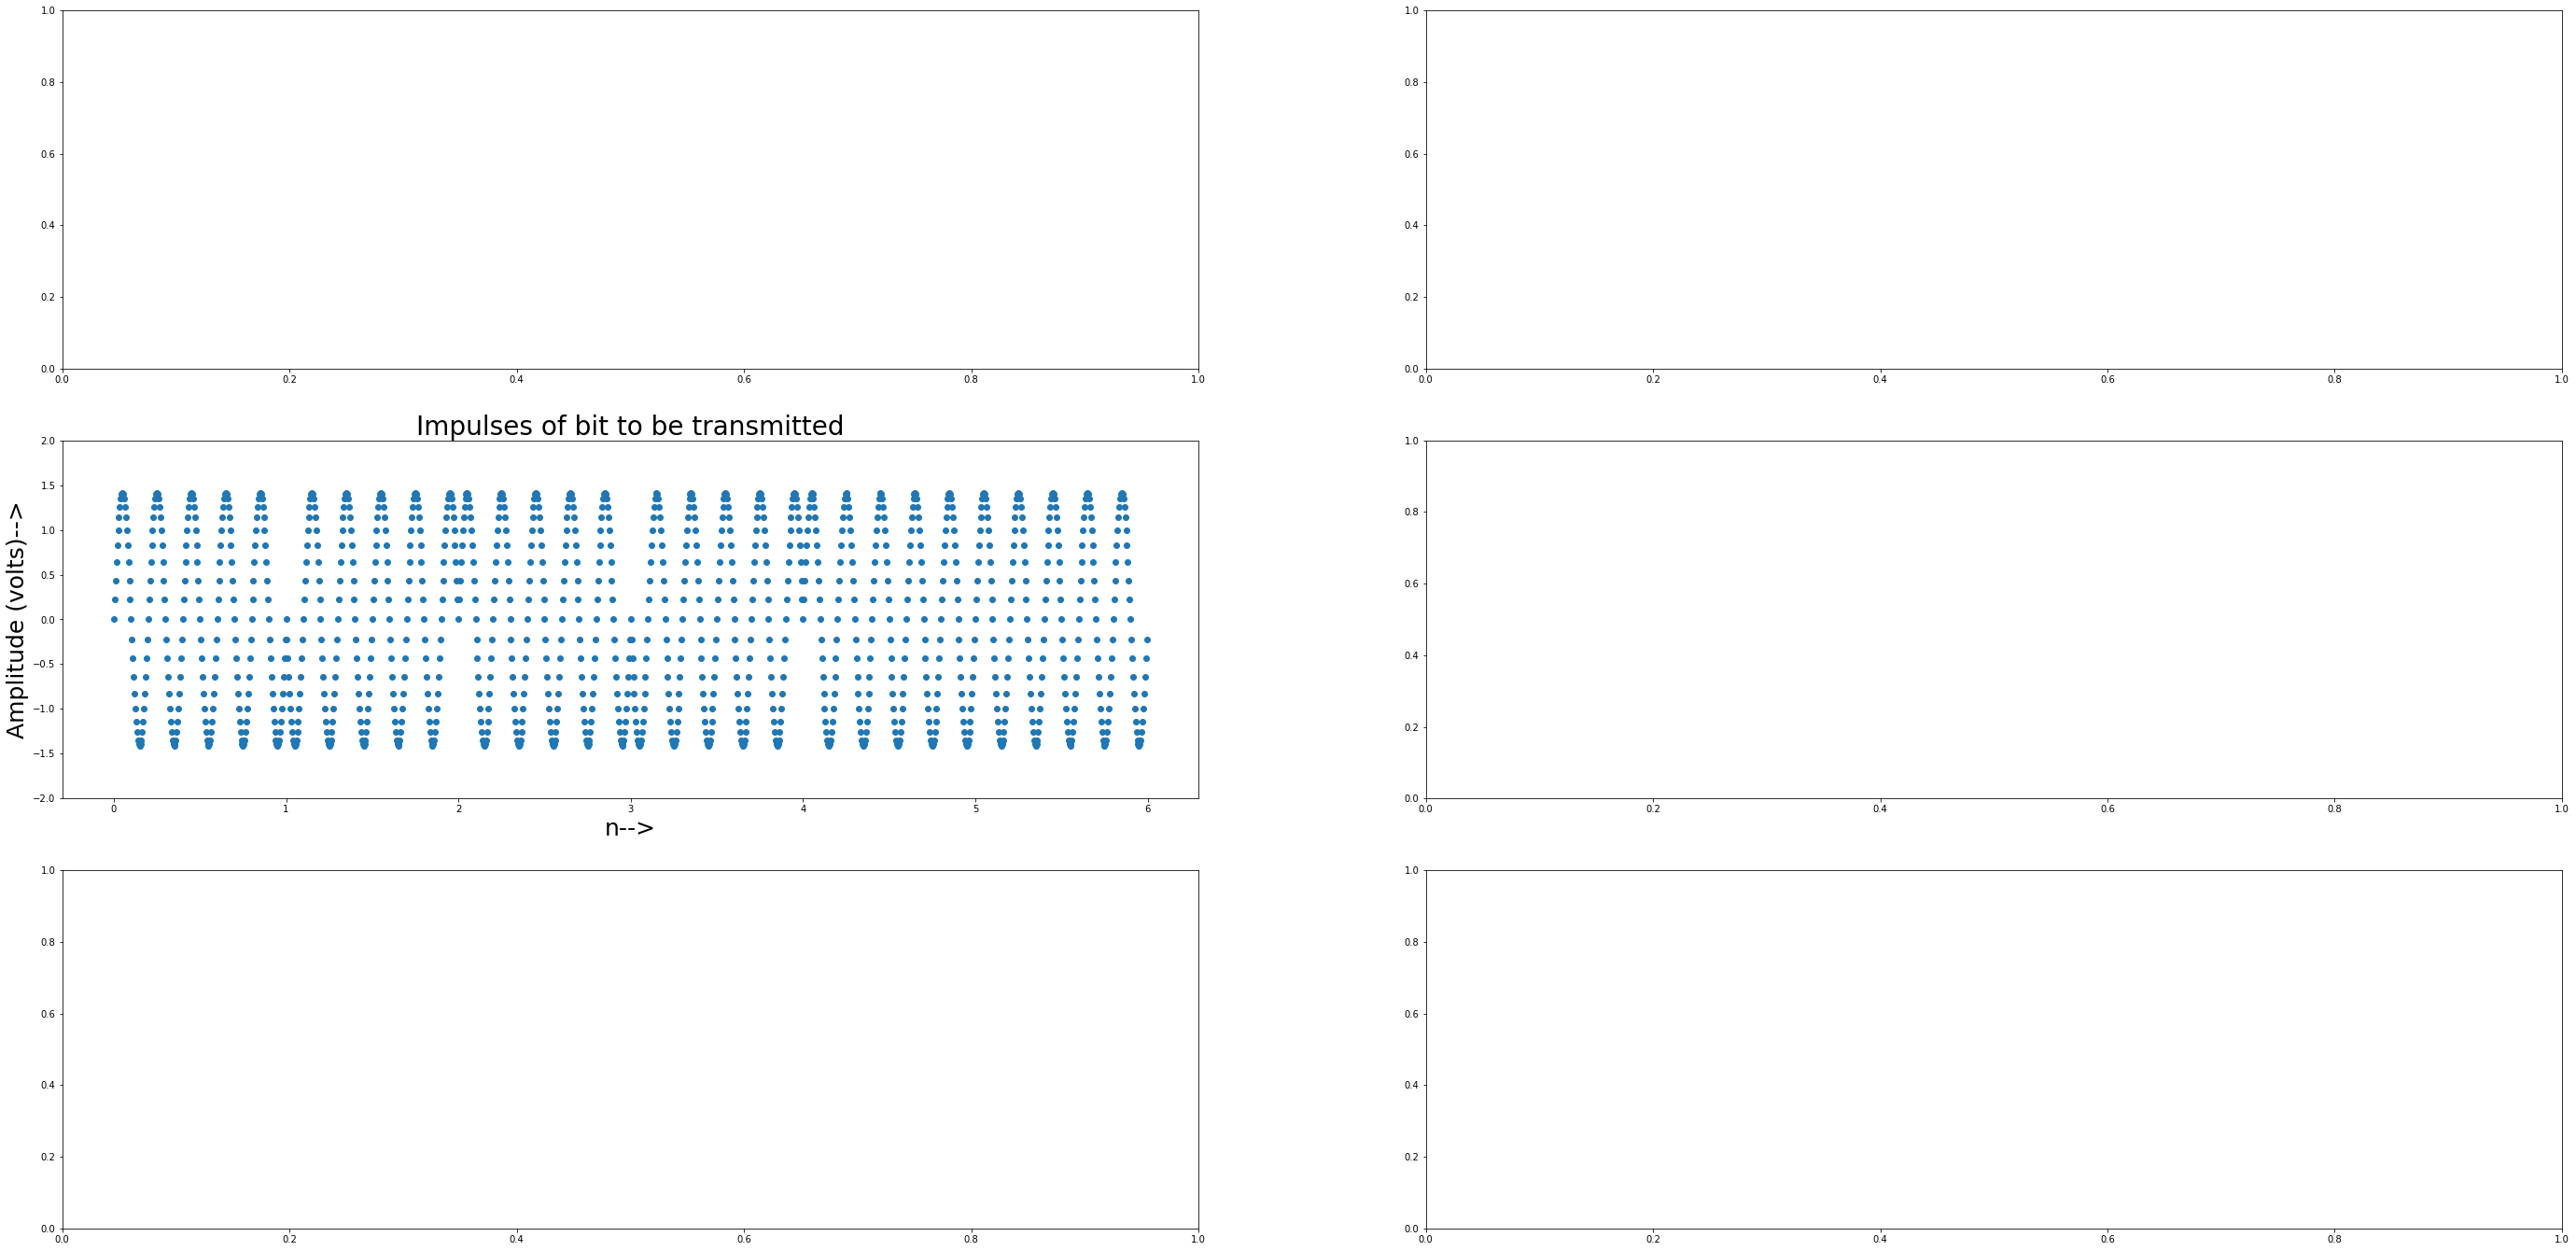

## Demodulation

### Step-01

C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

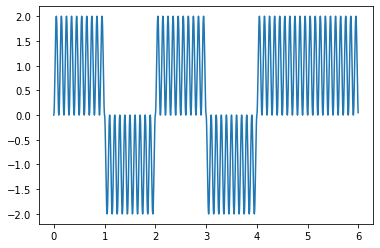

In [51]:
demod_product= Modulated * c
n1=n.reshape(len(b)*N,)
demod_prod=demod_product.reshape(len(b)*N,)
sns.lineplot(n1,demod_prod)

### Step-02

C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

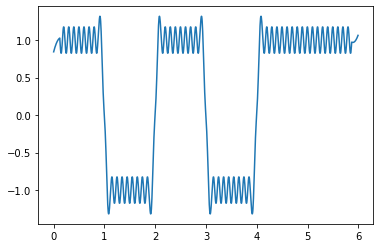

In [52]:
demod_filt=savgol_filter(demod_prod,50,2)
sns.lineplot(n1,demod_filt)

In [53]:
sum(demod_filt[200:400])/200

-0.9589447997761877

### Step-03

In [54]:
n1=0;
n2=200;
received=np.empty((1,len(b)))

for index in range(0,len(b)):
    
    n=np.arange(n1,n2);
    
    decision_value=sum(demod_filt[n1:n2])/len(n);
    
    if decision_value>0:
        received[:,index]=1;
    else:
        received[:,index]=0;
    
    
    n1=n1+200;
    n2=n2+200;

print(received)

[[1. 0. 1. 0. 1. 1.]]


In [55]:
n1=0
n2=Tb*len(b)
n=np.arange(n1,n2,1/N)
n.shape
NRZ_out=NRZ_out.reshape(N*len(b),)
Modulated=Modulated.reshape(N*len(b),)

C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'Amplitude (volts)-->')

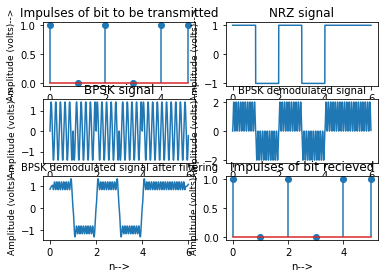

In [58]:
plt.figure
plt.subplot(3,2,1)
plt.stem(b)
plt.title("Impulses of bit to be transmitted",{'fontsize':12})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
plt.subplot(3,2,2)
sns.lineplot(n,NRZ_out)
plt.title("NRZ signal",{'fontsize':12})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
plt.subplot(3,2,3)
sns.lineplot(n,Modulated)
plt.title("BPSK signal",{'fontsize':12})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
plt.subplot(3,2,4)
sns.lineplot(n,demod_prod)
plt.title("BPSK demodulated signal",{'fontsize':10})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
plt.subplot(3,2,5)
sns.lineplot(n,demod_filt)
plt.title("BPSK demodulated signal after filtering",{'fontsize':10})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
plt.subplot(3,2,6)
plt.stem(received[0])
plt.title("Impulses of bit recieved",{'fontsize':12})
plt.xlabel('n-->',{'fontsize':10})
plt.ylabel('Amplitude (volts)-->',{'fontsize':9})